<h2>Mục Lục<span class="tocSkip"></span></h2>
<div class="toc"><ul class="toc-item"><li><span><a href="#Khám-phá-tập-dữ-liệu-Pima" data-toc-modified-id="Khám-phá-tập-dữ-liệu-Pima"><span class="toc-item-num">1&nbsp;&nbsp;</span>Thu thập dữ liệu</a></span></li><li><span><a href="#Tiền-xử-lý" data-toc-modified-id="Tiền-xử-lý"><span class="toc-item-num">2&nbsp;&nbsp;</span>Khám phá dữ liệu</a></span><ul class="toc-item"></ul></li><li><span><a href="#Mô-hình-Logistic-Regression" data-toc-modified-id="Mô-hình-Logistic-Regression"><span class="toc-item-num">3&nbsp;&nbsp;</span>Các câu hỏi cần trả lời</a></span></li><li><span><a href="#Trực-quan-dữ-liệu" data-toc-modified-id="Trực-quan-dữ-liệu"><span class="toc-item-num">4&nbsp;&nbsp;</span>Nhìn lại quá trình làm đồ án</a></span></li><li><span><a href="#Đánh-giá-mô-hình" data-toc-modified-id="Đánh-giá-mô-hình"><span class="toc-item-num">5&nbsp;&nbsp;</span>Tài liệu tham khảo</a></span></li></ul></div>

# 1. Thu thập dữ liệu

- **Chủ đề của dữ liệu: Traffic accident in UK** 
- **Nguồn dữ liệu: Kaggle**
- **Link:** https://www.kaggle.com/daveianhickey/2000-16-traffic-flow-england-scotland-wales
- **License:  Open Givernment Licence**
- **Cách tác giả thu thập dữ liệu: The raw datasets are available from the UK Department of Transport website.** 

# 2. Khám phá dữ liệu

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import seaborn as sns
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose

### Đọc dữ liệu từ file CSV đã tải xuống sẵn vào DataFrame

<b>Dữ liệu về số vụ tai nạn tại nước Anh từ năm 2012 - 2014</b>

In [2]:
df = pd.read_csv("accidents_2012_to_2014.csv")
df.head()

/home/luatvy/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,201201BS70001,527200,178760,-0.169101,51.493429,1,3,2,1,19/01/2012,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002821,2012
1,201201BS70002,524930,181430,-0.200838,51.517931,1,3,2,1,04/01/2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01004760,2012
2,201201BS70003,525860,178080,-0.188636,51.487618,1,3,2,1,10/01/2012,...,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002893,2012
3,201201BS70004,524980,181030,-0.200259,51.514325,1,3,1,1,18/01/2012,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002886,2012
4,201201BS70005,526170,179200,-0.183773,51.497614,1,3,1,1,17/01/2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002890,2012


### Dữ liệu gồm có bao nhiêu dòng và bao nhiêu cột?

In [3]:
df.shape

(464697, 33)

- Dữ liệu gồm 464.697 dòng và 33 cột

### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

- Một dòng cho biết thông tin của một vụ tai nạn. 
- Các dòng thì có ý nghĩa giống nhau.

### Dữ liệu có các dòng bị lặp không?

In [4]:
df.duplicated().any()

True

- Tồn tại những dòng trùng lặp.
- Do dữ liệu lớn nên trong quá trình thu thập bị trùng

In [5]:
df = df.drop_duplicates().reset_index(drop=True)
df.shape

(430550, 33)

- Xóa các dòng trùng lặp dữ liệu còn 430.550 dòng

### Mỗi cột có ý nghĩa gì?

Mô tả các cột như sau:
- **Accident_Index**: Mã định danh cho một vụ tai nạn.
- **Location_Easting_OSGR** và **Location_Northing_OSGR**: Tọa độ sử dụng Grid reference system để tham chiếu tìm vị trí. (Có thể sử dụng trang https://magic.defra.gov.uk/ để tìm vị trí của tọa độ đã cho) .
- **Longitude** và **Latitude**: Kinh độ và vĩ độ của vị trí xảy ra tai nạn.
- **Police_Force**: Lực lượng cảnh sát được giao nhiệm vụ xử lí vụ tai nạn.
- **Accident_Severity**: Mức độ của tai nạn (1-nặng, 2-nhẹ, 3-nặng) .
- **Number_of_Vehicles**: Số lượng phương tiện trong vụ tai nạn.
- **Number_of_Casualties**: Số lượng thương vong (bị thương hoặc tử vong).
- **Date**: Ngày tháng năm xảy ra tai nạn
- **Day_of_Week**: Thứ trong tuần xảy ra tai nạn. (chủ nhật, thứ hai, ...)
- **Time**: Giờ và phút xảy ra tai nạn (tính theo múi giờ UK)
- **Local_Authority_(District)**: thị trấn, quận nơi xảy ra tai nạn.
- **Local_Authority_(Highway)**: Cơ quan chịu trách nhiệm vận hành, quản lý và bảo trì đường giao thông công cộng tại nơi xảy ra tai nạn.
- **1st_Road_Class**: Phân loại đường. (đường của nhà nước, đường của địa phương tự quản, ...)
- **1st_Road_Number**: Tên đường xảy ra tai nạn. (dạng số)
- **Road_Type**: Loại đường (đường một chiều, đường nhánh, ...)
- **Speed_limit**: Tốc độ cho phép trên con đường xảy ra tai nạn.
- **Junction_Detail**: Chi tiết nút giao thông.
- **Junction_Control**: kiểm soát nút giao thông. (đèn tín hiệu tự động, tự do di chuyển không kiểm soát, ...).
- **2nd_Road_Class**: Nếu vụ tai nạn xảy ra tại giao hai con đường thì là phân loại cho đường thứ hai.
- **2nd_Road_Number**: Tương tự trên nếu xảy ra tại nơi giao hai con đường thì là số đường của đường thứ hai.
- **Pedestrian_Crossing-Human_Control**: Có hay không người điều khiển khu vực qua đường dành cho người đi bộ trong bán kính 50 mét ở khu tai nạn.
- **Pedestrian_Crossing-Physical_Facilities**: Cơ sở vật chất của khu vực qua đường cho người đi bộ (vạch kẻ đường, đường hầm, cầu vượt, ...)
- **Light_Conditions**: Điều kiện ánh sáng tại nơi xảy ra tai nạn.
- **Weather_Conditions**: Điều kiện thời tiết tại nơi xảy ra tai nạn.
- **Road_Surface_Conditions**: Điều kiện mặt đường tại nơi xảy ra tai nạn.
- **Special_Conditions_at_Site**: Điều kiện đặc biệt nào khác tại nơi xảy ra tai nạn. (đường hư, ...)
- **Carriageway_Hazards**: Có vật cản gì tại nơi xảy ra tai nạn hay không. (Động vật băng qua đường, ...)
- **Urban_or_Rural_Area**: Nội ô hay ngoại ô.
- **Did_Police_Officer_Attend_Scene_of_Accident**: Cảnh sát có đến hiện trường vụ tai nạn không.
- **LSOA_of_Accident_Location**: Vị trí cho những vùng nhỏ không có trên bản đồ lớn ở Anh.
- **Year**: Năm xảy ra tai nạn.

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [6]:
df.dtypes

Accident_Index                                  object
Location_Easting_OSGR                            int64
Location_Northing_OSGR                           int64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                       object
Speed_limit                                      int64
Junction_D

### Chuyển các cột có kiểu dữ liệu không phù hợp sang đúng kiểu dữ liệu của nó

In [7]:
df['Accident_Severity'] = df['Accident_Severity'].astype('str')
df['Local_Authority_(District)'] = df['Local_Authority_(District)'].astype('str')
df['Speed_limit'] = df['Speed_limit'].astype('str')
df['Urban_or_Rural_Area'] = df['Urban_or_Rural_Area'].astype('str')

**Các cột có dạng kiểu object**

In [8]:
obj_cols = df.select_dtypes(include='object').columns
obj_cols

Index(['Accident_Index', 'Accident_Severity', 'Date', 'Time',
       'Local_Authority_(District)', 'Local_Authority_(Highway)', 'Road_Type',
       'Speed_limit', 'Junction_Control', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')

Ta sẽ xem cụ thể trong các cột Object có các kiểu dữ liệu gì?

In [9]:
def open_object_dtype(s):
    dtypes = set()
    s.apply(lambda x: dtypes.add(type(x)))
    return dtypes

In [10]:
for i in range(0,len(obj_cols)):    
    print(obj_cols[i], open_object_dtype(df[obj_cols[i]]))

Accident_Index {<class 'str'>}
Accident_Severity {<class 'str'>}
Date {<class 'str'>}
Time {<class 'str'>, <class 'float'>}
Local_Authority_(District) {<class 'str'>}
Local_Authority_(Highway) {<class 'str'>}
Road_Type {<class 'str'>}
Speed_limit {<class 'str'>}
Junction_Control {<class 'str'>, <class 'float'>}
Pedestrian_Crossing-Human_Control {<class 'str'>}
Pedestrian_Crossing-Physical_Facilities {<class 'str'>}
Light_Conditions {<class 'str'>}
Weather_Conditions {<class 'str'>}
Road_Surface_Conditions {<class 'str'>, <class 'float'>}
Special_Conditions_at_Site {<class 'str'>, <class 'float'>}
Carriageway_Hazards {<class 'str'>, <class 'float'>}
Urban_or_Rural_Area {<class 'str'>}
Did_Police_Officer_Attend_Scene_of_Accident {<class 'str'>, <class 'float'>}
LSOA_of_Accident_Location {<class 'str'>, <class 'float'>}


* Ta sẽ tiền xử lí ở cột `Date` khi dữ liệu ở đây chưa ở dạng datetime để dễ xử lí.
* Còn các cột chứa chuỗi str và chứa cả kiểu float tức là chứa các giá trị nan.

## Tiền xử lí

### Chuyển dtype của cột "Date" sang datetime

In [11]:
df.Date = pd.to_datetime(df.Date)
df.Time = pd.to_datetime(df.Time).dt.time

## Tiếp tục khám phá dữ liệu

### Với mỗi cột có kiểu dữ liệu dạng numeric, các giá trị được phân bố như thế nào?

**Ta có 12 cột Numeric**: "Location_Easting_OSGR",
 "Location_Northing_OSGR",
 "Longitude",
 "Latitude",
 "Number_of_Vehicles",
 "Number_of_Casualties",
 "Date",
 "Day_of_Week",
 "Time",
 "1st_Road_Number",
 "2nd_Road_Number",
 "Year"

Ta sẽ tìm tỉ lệ % các giá trị thiếu, min và max của mỗi cột numeric.

In [12]:
df_temp=df[["Location_Easting_OSGR", "Location_Northing_OSGR", "Longitude", "Latitude", "Number_of_Vehicles", "Number_of_Casualties", "Date", "Day_of_Week", "Time", "1st_Road_Number", "2nd_Road_Number", "Year"]]
def missing_ratio(df):
    return df.isna().mean() * 100
nume_col_profiles_df = df_temp.agg([missing_ratio,pd.Series.min,pd.Series.max])
nume_col_profiles_df

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,1st_Road_Number,2nd_Road_Number,Year
missing_ratio,0.0,0.0,0.000000,0.000000,0.0,0.0,0,0.0,0.003019,0.0,0.0,0.0
min,65510.0,10290.0,-7.509162,49.912941,1.0,1.0,2012-01-01 00:00:00,1.0,NaN,0.0,-1.0,2012.0
max,655370.0,1190858.0,1.759382,60.597984,67.0,93.0,2014-12-31 00:00:00,7.0,NaN,9999.0,9999.0,2014.0


Cột Time có giá trị thiếu các cột còn lại thì đầy đủ. Ở cột 2nd_Road_Number giá trị min là -1, theo mô tả thì -1 tức là nan (không có giá trị).<br>
Số lượng giá trị thiếu của Time là rất rất nhỏ so với tổng số lượng dòng nên ta sẽ bỏ đi các giá trị thiếu này luôn.

In [13]:
df=df.dropna(subset=['Time'])

In [14]:
nume_col_profiles_df = df_temp.agg([missing_ratio,min,max])
nume_col_profiles_df

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,1st_Road_Number,2nd_Road_Number,Year
missing_ratio,0.0,0.0,0.000000,0.000000,0.0,0.0,0,0.0,0.003019,0.0,0.0,0.0
min,65510.0,10290.0,-7.509162,49.912941,1.0,1.0,2012-01-01 00:00:00,1.0,NaN,0.0,-1.0,2012.0
max,655370.0,1190858.0,1.759382,60.597984,67.0,93.0,2014-12-31 00:00:00,7.0,NaN,9999.0,9999.0,2014.0


### Với mỗi cột có kiểu dữ liệu dạng categorical, các giá trị được phân bố như thế nào?

**Ta có 21 cột dạng Categorical gồm:** "Accident_Index",
 "Police_Force",
 "Accident_Severity",
 "Local_Authority_(District)",
 "Local_Authority_(Highway)",
 "1st_Road_Class",
 "Road_Type",
 "Speed_limit",
 "Junction_Detail",
 "Junction_Control",
 "2nd_Road_Class",
 "Pedestrian_Crossing-Human_Control",
 "Pedestrian_Crossing-Physical_Facilities",
 "Light_Conditions",
 "Weather_Conditions",
 "Road_Surface_Conditions",
 "Special_Conditions_at_Site",
 "Carriageway_Hazards",
 "Urban_or_Rural_Area",
 "Did_Police_Officer_Attend_Scene_of_Accident",
 "LSOA_of_Accident_Location"

Với mỗi cột categorical, ta tính tỉ lệ % giá trị thiếu, số lượng giá trị khác nhau, list/array các giá trị khác nhau.

In [15]:
df_temp = df[["Accident_Index", "Police_Force", "Accident_Severity", "Local_Authority_(District)", "Local_Authority_(Highway)", "1st_Road_Class", "Road_Type", "Speed_limit", "Junction_Detail", "Junction_Control", "2nd_Road_Class", "Pedestrian_Crossing-Human_Control", "Pedestrian_Crossing-Physical_Facilities", "Light_Conditions", "Weather_Conditions", "Road_Surface_Conditions", "Special_Conditions_at_Site", "Carriageway_Hazards", "Urban_or_Rural_Area", "Did_Police_Officer_Attend_Scene_of_Accident", "LSOA_of_Accident_Location"]]

cate_col_profiles_df = df_temp.agg([missing_ratio,pd.Series.nunique,pd.Series.unique])
cate_col_profiles_df

,Accident_Index,Police_Force,Accident_Severity,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,Road_Type,Speed_limit,Junction_Detail,Junction_Control,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
missing_ratio,0,0,0,0,0,0,0,0,100,38.927,...,0,0,0,0,0.172343,0.000464536,0.000696804,0,0.000464536,6.66702
nunique,263811,51,3,380,207,6,6,7,0,4,...,3,6,5,9,5,8,6,2,2,34284
unique,"[201201BS70001, 201201BS70002, 201201BS70003, ...","[1, 48, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14, 16,...","[3, 2, 1]","[12, 1, 11, 28, 570, 3, 5, 4, 8, 2, 9, 30, 31,...","[E09000020, E09000033, E09000013, E09000005, E...","[3, 4, 5, 6, 1, 2]","[Single carriageway, One way street, Roundabou...","[30, 50, 40, 20, 70, 60, 10]",[nan],"[Automatic traffic signal, Giveway or uncontro...",...,"[None within 50 metres, Control by other autho...","[Pedestrian phase at traffic signal junction, ...","[Darkness: Street lights present and lit, Dayl...","[Fine without high winds, Raining without high...","[Dry, Wet/Damp, Frost/Ice, Snow, Flood (Over 3...","[None, Roadworks, Mud, Auto traffic singal out...","[None, Other object in carriageway, Any animal...","[1, 2]","[Yes, No, nan]","[E01002821, E01004760, E01002893, E01002886, E..."


Ở các cột categorical thì có vẻ giá trị thiếu đã nhiều hơn so với các cột Numeric.

# 3. Các câu hỏi cần trả lời

###  Các district nào xảy ra nhiều tai nạn nhất (lấy top 3)? Trong các district trên các yếu tố ánh sáng, thời tiết, mặt đường ảnh hưởng như thế nào đến số lượng các vụ tai nạn?

In [15]:
df['Local_Authority_(District)'] = df['Local_Authority_(District)'].astype('str')

In [16]:
top_district_accident = df.groupby('Local_Authority_(District)')['Accident_Index'].count().nlargest(3)
top_district_accident

Local_Authority_(District)
300    7289
204    5656
1      4653
Name: Accident_Index, dtype: int64

<AxesSubplot:xlabel='Local_Authority_(District)'>

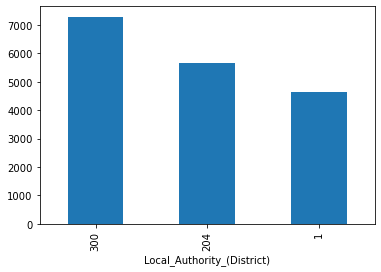

In [17]:
top_district_accident.plot(kind = 'bar')

In [18]:
df[((df['Local_Authority_(District)'] == top_district_accident.index[0]) | \
    (df['Local_Authority_(District)'] == top_district_accident.index[1]) | \
    (df['Local_Authority_(District)'] == top_district_accident.index[2]))] \
[['Light_Conditions','Weather_Conditions','Road_Surface_Conditions']].value_counts().nlargest(5).to_frame()

0
Light_Conditions                        Weather_Conditions         Road_Surface_Conditions      
Daylight: Street light present          Fine without high winds    Dry                      9237
Darkness: Street lights present and lit Fine without high winds    Dry                      2533
Daylight: Street light present          Raining without high winds Wet/Damp                 1041
                                        Fine without high winds    Wet/Damp                  959
Darkness: Street lights present and lit Raining without high winds Wet/Damp                  812

In [19]:
df[((df['Local_Authority_(District)'] == top_district_accident.index[0]) | \
    (df['Local_Authority_(District)'] == top_district_accident.index[1]) | \
    (df['Local_Authority_(District)'] == top_district_accident.index[2]))] \
[['Light_Conditions','Weather_Conditions','Road_Surface_Conditions']].value_counts().nsmallest(5).to_frame()

0
Light_Conditions                          Weather_Conditions         Road_Surface_Conditions   
Darkeness: No street lighting             Raining without high winds Frost/Ice                1
Darkness: Street lights present but unlit Fine without high winds    Frost/Ice                1
                                          Raining with high winds    Wet/Damp                 1
Daylight: Street light present            Snowing with high winds    Dry                      1
Darkeness: No street lighting             Other                      Frost/Ice                1

- **Nhận xét:**
    - Thời tiết tốt thì số lượng phương tiện tham gia giao thông nhiều nên nhiều tai nạn
    - Thời tiết xấu số lượng phương tiên tham gia ít nên ít tai nạn

###  Số lượng các vụ tai nạn giao thông hàng tháng qua các năm như thế nào?

In [20]:
df['Urban_or_Rural_Area'] = df['Urban_or_Rural_Area'].astype('str')

In [21]:
new_month = df['Date'].dt.month
new_month.rename('Month',inplace=True)
df = pd.concat([df,new_month],axis=1)

<AxesSubplot:xlabel='Month'>

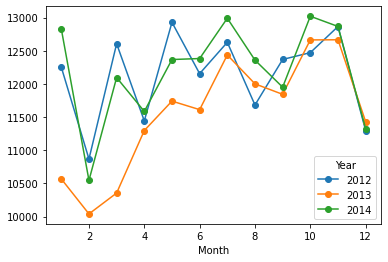

In [22]:
num_accident_each_month = df.groupby(['Year','Month'])['Accident_Index'].count().unstack(level=0)
num_accident_each_month.plot.line(marker='o')

- **Nhận xét:**
    - Ta thấy từ tháng 1 qua 2 và 11 qua 12 ở các năm đều giảm mạnh
    - Có thể do đây là các tháng có mùa đông ở Anh nên các phương tiện đi lại ít

### Việc giới hạn tốc độ trên đường có làm giảm số vụ tai nạn và mức độ nghiêm trọng không? Gần xong còn tính cái bảng ratio

In [23]:
df['Speed_limit'] = df['Speed_limit'].astype('str')
df['Accident_Severity'] = df['Accident_Severity'].astype('str')

In [24]:
accident_speed_limit = df['Speed_limit'].value_counts()
accident_speed_limit

30    279465
60     61170
40     35421
70     29794
50     16357
20      8329
10         1
Name: Speed_limit, dtype: int64

<AxesSubplot:>

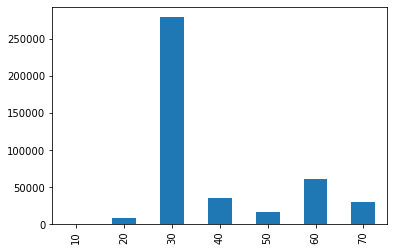

In [25]:
accident_speed_limit.sort_index().plot(kind='bar')

In [26]:
c = df.groupby('Speed_limit')['Accident_Severity'].value_counts().rename('Number_Accident_Severity').to_frame()

In [27]:
temp = c.unstack(-1)
temp

Number_Accident_Severity                   
Accident_Severity                        1        2         3
Speed_limit                                                  
10                                     NaN      NaN       1.0
20                                    43.0   1245.0    7041.0
30                                  1691.0  36203.0  241571.0
40                                   447.0   5295.0   29679.0
50                                   330.0   2590.0   13437.0
60                                  1784.0  12213.0   47173.0
70                                   607.0   3649.0   25538.0

đang tìm lệnh tính cái ratio của bảng trên

In [28]:
h = temp['Number_Accident_Severity'].sum(axis=1)
temp['Number_Accident_Severity'].apply(lambda s: s/h, axis=0)

Accident_Severity,1,2,3
Speed_limit,,,
10,NaN,NaN,1.000000
20,0.005163,0.149478,0.845360
30,0.006051,0.129544,0.864405
40,0.012620,0.149488,0.837893
50,0.020175,0.158342,0.821483
60,0.029165,0.199657,0.771179
70,0.020373,0.122474,0.857152


- **Nhận xét:**
    - Khi lưu thông trên đoạn đường có tốc độ cho phép lớn thì tỉ lệ xảy ra tai nạn nghiêm trọng cũng cao
    - Ở cột có Accident_Severity = 1 (mức độ nghiêm trọng nhất) thì cái tỉ lệ tăng từ 0.005163 đến 0.029165

### Thời gian xảy ra tai nạn nhiều nhất?

In [29]:
df.Time = pd.to_datetime(df.Time,format='%H:%M:%S')

In [30]:
new_hour = df['Time'].dt.hour
new_hour.rename('Hour',inplace=True)
df = pd.concat([df,new_hour],axis=1)

In [31]:
accident_hour = df.groupby('Hour')['Accident_Index'].count()

<AxesSubplot:xlabel='Hour'>

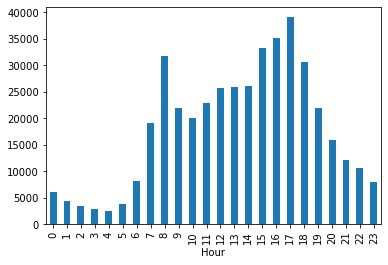

In [32]:
accident_hour.plot.bar()

- Thời xảy ra nhiều số vụ tai nạn nhất là 17h có lẽ đây là giờ cao điểm, số lượng phương tiên đi lại nhiều

### Số vụ tai nạn trong ngày của thành thị và nông thôn có tương quan gì với nhau hay không?

In [33]:
df.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year', 'Month', 'Hour'],
      dtype='object')

In [34]:
temp = df.groupby(['Date','Urban_or_Rural_Area'])['Accident_Index'].count().unstack(level = 0)
temp

Date,2012-01-01,2012-01-02,2012-01-03,2012-01-04,2012-01-05,2012-01-06,2012-01-07,2012-01-08,2012-01-09,2012-01-10,...,2014-12-22,2014-12-23,2014-12-24,2014-12-25,2014-12-26,2014-12-27,2014-12-28,2014-12-29,2014-12-30,2014-12-31
Urban_or_Rural_Area,,,,,,,,,,,,,,,,,,,,,
1,164,283,313,207,240,264,213,225,189,270,...,259,232,226,68,168,171,135,170,162,153
2,85,141,126,122,136,151,134,134,108,164,...,108,114,122,60,97,98,114,115,115,70


In [35]:
a = temp.iloc[1].values
b = temp.iloc[0].values

In [36]:
linear = pd.DataFrame({'A':a,'B':b})
linear

,A,B
0,85,164
1,141,283
2,126,313
3,122,207
4,136,240
...,...,...
1091,98,171
1092,114,135
1093,115,170
1094,115,162


<AxesSubplot:xlabel='A', ylabel='B'>

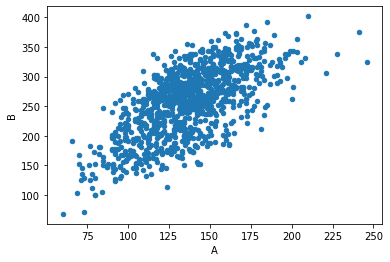

In [37]:
linear.plot.scatter(x='A',y='B')

0.6599046576409419

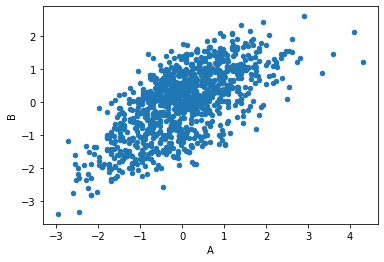

In [38]:
linear = (linear - linear.mean(axis=0)) / linear.std(axis=0, ddof=0) # Lưu ý ddof!
linear.plot.scatter('A', 'B')
linear.prod(axis=1).mean()

In [42]:
Urban_Rural = df.groupby(['Year','Urban_or_Rural_Area'])['Accident_Index'].count().unstack()
Urban_Rural

Urban_or_Rural_Area,1,2
Year,,
2012,95352,50214
2013,89997,48654
2014,96285,50035


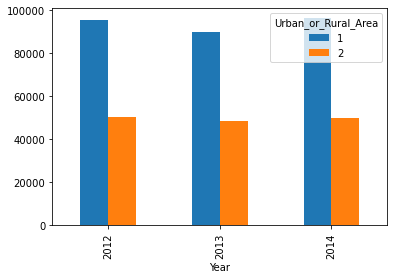

In [43]:
Urban_Rural.plot.bar()
plt.show()


- Lí do có lẽ là do lưu lượng xe khá là khác biệt giữa hai vùng khi thành phố có dân cư và xe cộ đông đúc hơn hẳn so với nông thôn.

### Địa điểm xảy ra nhiều vụ tai nạn nhất và vị trí phân bố của các vụ tai nạn

In [39]:
df_coord = pd.DataFrame(df.groupby(['Location_Easting_OSGR', 'Location_Northing_OSGR'])['Accident_Index'].count().sort_values())
df_coord.columns=['Counts']
df_coord

Counts
Location_Easting_OSGR Location_Northing_OSGR        
65510                 801820                       1
497390                148790                       1
                      145043                       1
                      100390                       1
497389                370776                       1
...                                              ...
532970                180950                      16
527830                176540                      17
532700                181110                      19
534940                181890                      24
531630                181170                      30

[402368 rows x 1 columns]

Như trên có thể thấy tọa độ 531630, 181170 xảy ra 30 vụ tai nạn trong 3 năm.

In [41]:
# fig, ax = plt.subplots()
# df.plot(
#     kind="scatter",
#     x="Location_Easting_OSGR",
#     y="Location_Northing_OSGR",
#     alpha=0.5,
#     s=50,
#     label="Trafic Accident",
#     figsize=(10, 8),
#     c="Accident_Severity",
#     cmap=plt.get_cmap("jet"),
#     colorbar=True,
#     ax=ax
# )
# plt.show()

# 4. Nhìn lại quá trình làm đồ án

# 5. Tài liệu tham khảo